In [1]:
versioninfo()

Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (x86_64-apple-darwin22.4.0)
  CPU: 8 × Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 8 virtual cores


In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Dropbox/class/M1399.000200/2023/M1300_000200-2023fall/lectures/18-socp`


Status `~/Dropbox/class/M1399.000200/2023/M1300_000200-2023fall/lectures/18-socp/Project.toml`
  [1e616198] COSMO v0.8.8
  [f65535da] Convex v0.15.4
  [a93c6f00] DataFrames v1.6.1
  [2e9cd046] Gurobi v1.2.0
  [b99e6be6] Hypatia v0.7.3
  [b6b21f68] Ipopt v1.5.1
  [b8f27783] MathOptInterface v1.22.0
  [6405355b] Mosek v10.1.3
  [1ec41992] MosekTools v0.15.1
  [91a5bcdd] Plots v1.39.0
  [c946c3f1] SCS v2.0.0


## Second-Order Cone Programming (SOCP)

$$
\begin{eqnarray*}
	&\text{minimize}& \mathbf{f}^T \mathbf{x} \\
	&\text{subject to}& \|\mathbf{A}_i \mathbf{x} + \mathbf{b}_i\|_2 \le \mathbf{c}_i^T \mathbf{x} + d_i, \quad i = 1,\ldots,m \\
	& & \mathbf{F} \mathbf{x} = \mathbf{g}
\end{eqnarray*}
$$
over $\mathbf{x} \in \mathbb{R}^d$. This says the points $(\mathbf{A}_i \mathbf{x} + \mathbf{b}_i, \mathbf{c}_i^T \mathbf{x} + d_i)$ live in the second order cone (ice cream cone, Lorentz cone, quadratic cone)
$$
\begin{eqnarray*}
	\mathbb{L}^{d+1} = \{(\mathbf{x}, t): \|\mathbf{x}\|_2 \le t\}
\end{eqnarray*}
in $\mathbb{R}^{d+1}$.
$$

* QP is a special case of SOCP. Why?
    
---

* When $\mathbf{c}_i = \mathbf{0}$ for $i=1,\ldots,m$, SOCP is equivalent to a **quadratically constrained quadratic program (QCQP)**
\begin{eqnarray*}
	&\text{minimize}& (1/2) \mathbf{x}^T \mathbf{P}_0 \mathbf{x} +  \mathbf{q}_0^T \mathbf{x} \\
	&\text{subject to}& (1/2) \mathbf{x}^T \mathbf{P}_i \mathbf{x} +  \mathbf{q}_i^T \mathbf{x} + r_i \le 0, \quad i = 1,\ldots,m \\
	& & \mathbf{A} \mathbf{x} = \mathbf{b},
\end{eqnarray*}
where $\mathbf{P}_i \in \mathbf{S}_+^n$, $i=0,1,\ldots,m$. Why?

## SOC representability

* A convex set $S \in \mathbb{R}^n$ is said to be *second-order cone representable* (SOCr) if $S$ is the projection of a set in a higher-dimensional space that can be described by a set of second-order cone inequalities. Specifically,
$$
    \mathbf{x}\in S \iff \exists\mathbf{u}\in \mathbb{R}^m: 
    \left\| \mathbf{A}_i\begin{bmatrix} \mathbf{x} \\ \mathbf{u} \end{bmatrix} + \mathbf{b}_i \right\|_2
    \le \mathbf{c}_i^T\begin{bmatrix} \mathbf{x} \\ \mathbf{u} \end{bmatrix} + d_i, \quad i=1, \dotsc, N.
$$


* A convex function $f: \mathbb{R}^n \to \mathbb{R}$ is said to be SOCr if and only if $\text{epi}f$ is SOCr.

---

* A **rotated quadratic cone** in $\mathbb{R}^{d+1}$ is
\begin{eqnarray*}
	\mathbb{L}_r^{d+2} = \{(\mathbf{x}, t_1, t_2): \|\mathbf{x}\|_2^2 \le 2 t_1 t_2, \mathbf{x}\in\mathbb{R}^{d}, t_1 \ge 0, t_2 \ge 0\}.
\end{eqnarray*}

    - $\mathbb{L}_r^{d+2}$ is SOCr: $\|\mathbf{x}\|_2^2 \le 2 t_1 t_2,~t_1, t_2 \ge 0 \iff \left\| \begin{bmatrix} \mathbf{x} \\ \frac{t_1 - t_2}{2} \end{bmatrix} \right\|_2 \le \frac{t_1 + t_2}{2}$.
    - $\mathbb{L}^{d+1}$ is $\mathbb{L}_r^{d+2}$-representable: 
$$
    \|\mathbf{x}\|_2 \le t \implies \left\| \begin{bmatrix} \mathbf{x} \\ t/2 - t/2 \end{bmatrix} \right\|_2 \le t/2 + t/2.
$$
    - In fact $\mathbb{L}_r^{d+2}$ is the $\mathbb{L}^{d+2}$ rotated by 45$^\circ$ in the $t_1$-$t_2$ plane, hence 1-to-1 and onto:
$$
    \begin{bmatrix} \mathbf{x} \\ t_1 \\ t_2 \end{bmatrix}
    \mapsto
    \begin{bmatrix} \mathbf{x} \\ (t_1-t_2)/2 \\ (t_1+t_2)/2 \end{bmatrix}
$$

---

* Gurobi allows users to input second order cone constraint and quadratic constraints directly.

* Mosek allows users to input second order cone constraint, quadratic constraints, and rotated quadratic cone constraint directly.

## SOC-representable sets

### Elementary sets

1. (Epigraphs of affine functions) $\mathbf{a}^T\mathbf{x} + b \le t \iff (0, t - \mathbf{a}^T\mathbf{x} - b) \in \mathbb{L}^{2}$.

1. (Euclidean norms) $\|\mathbf{x}\|_2 \le t \Leftrightarrow (\mathbf{x}, t) \in \mathbb{L}^{d+1}$.
    - (Absolute values) $|x| \le t \Leftrightarrow (x, t) \in \mathbb{L}^2$.

1. (Sum of squares) $\|\mathbf{x}\|_2^2 \le t \Leftrightarrow (\mathbf{x}, t, 1/2) \in \mathbb{L}_r^{d+2}$.

1. (Epigraphs of quadratic-fractional functions) Let
$$
    g(\mathbf{x}, s) = \begin{cases} \frac{\mathbf{x}^T\mathbf{x}}{s}, & s > 0 \\ 0, & s=0, \mathbf{x}=\mathbf{0} \\ \infty, & \text{otherwise} \end{cases}
$$
Then, $\text{epi}g = \{(\mathbf{x}, t): \mathbf{x}^T\mathbf{x}/s \le t, s \ge 0 \} = \mathbb{L}_r^{d+2}$.

1. (Hyperbola) $\{(t,s)\in\mathbb{R}^2: ts \ge 1, t > 0\} = \text{epi}\tilde{g}$ with $\tilde{g}(s) = g(1,s)$ for the $g$ above.

---

### Operations that preserve SOCr of sets

1. Intersection.

1. Cartesian product.

1. Minkowski sum.

1. Image $\mathcal{A}C$ of a SOCr set $C$ under an linear (affine) map $\mathcal{A}$.

1. Inverse image $\mathcal{A}^{-1}C$ of a SOCr set $C$ under a linear (affine) map $\mathcal{A}$.

---

### Operations that preserve SOCr of functions

1. Nonnegative weighted sum.

1. Composition with an affine mapping.

1. Pointwise maximum and supremum.

1. Separable sum. $g(\mathbf{x}_1,\dotsc,\mathbf{x}_m) = g_1(\mathbf{x}_1) + \dotsb + g_m(\mathbf{x}_m)$ is SOCr if each summand is so.

1. Paritial minimization.

1. Perspective. If $f(\mathbf{x})$ is SOCr, then its *perspective* $g(\mathbf{x}, t)=t f(t^{-1}\mathbf{x})$ is SOCr.

---

### More complex (but useful) sets

* (Ellipsoids) For $\mathbf{P} \in \mathbb{S}_+^n$, we can find $\mathbf{F}\in \mathbb{R}^{d \times k}$ such that $\mathbf{P} = \mathbf{F}^T \mathbf{F}$. Then

$$
    \begin{eqnarray*}
        & \mathbf{x}^T \mathbf{P} \mathbf{x} + \mathbf{q}^T \mathbf{x} + r \le t \\
        \iff & (\mathbf{x}, t) \in \text{epi}f, \text{where } f(\mathbf{x})=\mathbf{x}^T\mathbf{P} \mathbf{x} + \mathbf{q}^T \mathbf{x} + r = \|\mathbf{F}\mathbf{x}\|_2^2 + \mathbf{q}^T \mathbf{x} + r,
    \end{eqnarray*}
$$    

  which is the sum of squared Euclidean norm (under a liner map) and an affine function. Both are SOCr.
    
  This fact shows that QP and QCQP are instances of SOCP.

---

* (Simple polynomial sets)

$$
    \begin{eqnarray*}
        \{(t, x): |t| \le \sqrt x, x \ge 0\} &=& \{ (t,x): (t, x, 1/2) \in \mathbb{L}_r^3\} \\
        \{(t, x): t \ge x^{-1}, x \ge 0\} &=& \{ (t,x): (\sqrt 2, x, t) \in \mathbb{L}_r^3\} \\
        \{(t, x): t \ge x^{3/2}, x \ge 0\} &=& \{ (t,x): (x, s, t), (s, x, 1/8) \in \mathbb{L}_r^3\} \\
        \{(t, x): t \ge x^{5/3}, x \ge 0\} &=& \{ (t,x): (x, s, t), (s, 1/8, z), (z, s, x) \in \mathbb{L}_r^3\} \\
        \{(t, x): t \ge x^{(2k-1)/k}, x \ge 0\}&,& k \ge 2, \text{can be represented similarly} \\
        \{(t, x): t \ge x^{-2}, x \ge 0\} &=& \{ (t,x): (s, t, 1/2), (\sqrt 2, x, s) \in \mathbb{L}_r^3\} \\
        \{(t, x, y): t \ge |x|^3/y^2, y \ge 0\} &=& \{ (t,x,y): (x, z) \in \mathbb{L}^2, (z, y/ 2, s), (s, t/2, z) \in \mathbb{L}_r^3\}
    \end{eqnarray*}
$$    

---

* (Geometric mean) The **hypograph** of the (concave) geometric mean function

$$
    \begin{eqnarray*}
        \mathbb{K}_{\text{gm}}^n = \{(\mathbf{x}, t) \in \mathbb{R}^{n+1}: (x_1 x_2 \cdots x_n)^{1/n} \ge t, \mathbf{x} \geq \mathbf{0}\}
    \end{eqnarray*}
$$    
  can be represented by rotated quadratic cones. For example,
  
$$
    \begin{eqnarray*}
        \mathbb{K}_{\text{gm}}^2 &=& \{(x_1, x_2, t): \sqrt{x_1 x_2} \ge t, x_1, x_2 \ge 0\} \\
        &=&  \{(x_1, x_2, t): (\sqrt 2 t, x_1, x_2) \in \mathbb{L}_r^3\}.
    \end{eqnarray*}
$$    

  Then,
$$    
    \begin{eqnarray*}
        \mathbb{K}_{\text{gm}}^4 &=& \{(x_1, x_2, x_3, x_4, t): \sqrt{x_1 x_2 x_3 x_4} \ge t, x_1, x_2, x_3, x_4 \ge 0\} \\
        &=&  \{(x_1, x_2, x_3, x_4, t): (\exists u_1, u_2 \ge 0)\sqrt{x_1 x_2} \ge u_1, \sqrt{x_3 x_4} \ge u_2, \sqrt{u_1u_2} \ge t, ~ x_1, x_2, x_3, x_4 \ge 0\} \\
        &=&  \{(x_1, x_2, t): (\exists u_1, u_2 \ge 0) (\sqrt 2 u_1, x_1, x_2) \in \mathbb{L}_r^3, (\sqrt 2 u_2, x_3, x_4) \in \mathbb{L}_r^3, (\sqrt 2 t, u_1, u_2) \in \mathbb{L}_r^3\}
    \end{eqnarray*}    
$$

  and so on.
    
  For $n\neq 2^l$, consider, e.g.,
  
$$
    (x_1 x_2 x_3)^{1/3} \ge t \iff (x_1 x_2 x_3 t)^{1/4} \ge t
$$

---

* (Convex increasing rational powers) For $p,q \in \mathbb{Z}_+$ and $p/q \ge 1$,

$$
    \begin{eqnarray*}
        \mathbb{K}^{p/q} = \{(x, t): x^{p/q} \le t, x \ge 0\} = \{(x,t): (t\mathbf{1}_q, \mathbf{1}_{p-q}, x) \in \mathbb{K}_{\text{gm}}^p\}.
    \end{eqnarray*}
$$

* (Convex decreasing rational powers) For any $p,q \in \mathbb{Z}_+$,

$$
    \begin{eqnarray*}
        \mathbb{K}^{-p/q} = \{(x, t): x^{-p/q} \le t, x \ge 0\} = \{(x,t): (x\mathbf{1}_p, t\mathbf{1}_{q}, 1) \in \mathbb{K}_{\text{gm}}^{p+q}\}.
    \end{eqnarray*}
$$

* (Harmonic mean) The hypograph of the harmonic mean function $\left( n^{-1} \sum_{i=1}^n x_i^{-1} \right)^{-1}$ is SOCr.

---

* (Rational $\ell_p$-norm) Function $\|\mathbf{x}\|_p = (\sum_{i=1}^d |x_i|^p)^{1/p}$ for $p \ge 1$ rational is SOCr.
    
* Now our catalogue of SOCP terms includes all above terms.

* Most of these function are implemented as the built-in function in the convex optimization modeling language `cvx` (for Matlab) or `Convex.jl` (for Julia).

## Example 1: group lasso

* In many applications, we need to perform variable selection at group level. For instance, in factorial analysis, we want to select or de-select the group of regression coefficients for a factor simultaneously. [Yuan and Lin (2006)](https://doi.org/10.1111/j.1467-9868.2005.00532.x) propose the group lasso that
\begin{eqnarray*}
	&\text{minimize}& \frac 12 \|\mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \beta\|_2^2 + \lambda \sum_{g=1}^G w_g \|\beta_g\|_2,
\end{eqnarray*}
where $\beta_g$ is the subvector of regression coefficients for group $g$, and $w_g$ are fixed group weights. This is equivalent to the SOCP
\begin{eqnarray*}
	&\text{minimize}& \frac 12 \beta^T \mathbf{X}^T \left(\mathbf{I} - \frac{\mathbf{1} \mathbf{1}^T}{n} \right) \mathbf{X} \beta +  \mathbf{y}^T \left(\mathbf{I} - \frac{\mathbf{1} \mathbf{1}^T}{n} \right) \mathbf{X} \beta + \lambda \sum_{g=1}^G w_g t_g \\
	&\text{subject to}& \|\beta_g\|_2 \le t_g, \quad g = 1,\ldots, G,
\end{eqnarray*}
in variables $\beta$ and $t_1,\ldots,t_G$.
    
* Overlapping groups are allowed here.

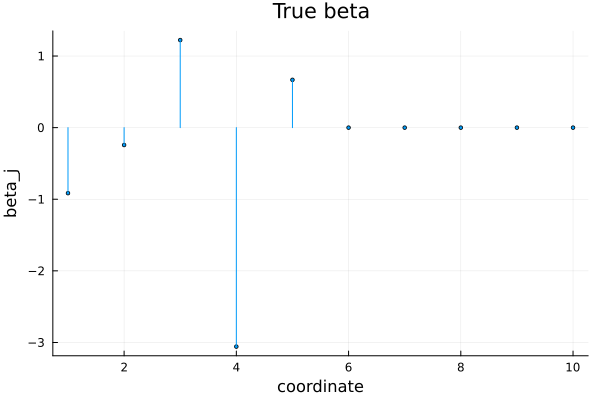

In [3]:
using Statistics
using Random, LinearAlgebra, SparseArrays

Random.seed!(123) # seed

n, p = 100, 10
# Design matrix
X0 = randn(n, p)
X = [ones(n, 1) (X0 .- mean(X0 ,dims=1)) ./ std(X0, dims=1)]   # design matrix is standardized and includes intercept
# True regression coefficients (first 5 are non-zero)
β = [1.0; randn(5); zeros(p - 5)]
# Responses
y = X * β + randn(n)

# plot the true β
using Plots; gr()

plt = plot(1:p, β[2:end], line=:stem, marker=2, legend=:none)
xlabel!(plt, "coordinate")
ylabel!(plt, "beta_j")
title!(plt, "True beta")

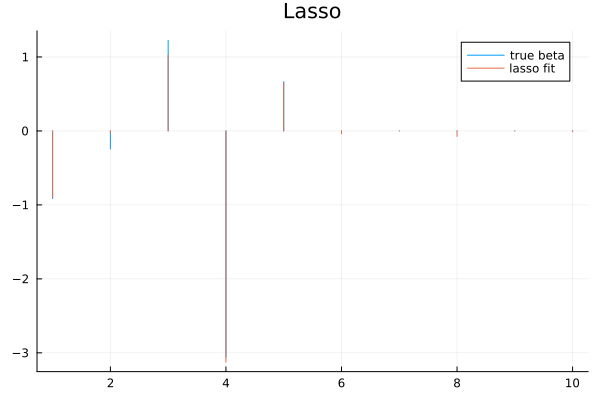

In [4]:
using Convex, MathOptInterface
using Mosek, MosekTools

const MOI = MathOptInterface

λ = 1
β̂lasso = Variable(size(X, 2))
problem = minimize(0.5sumsquares(y - X * β̂lasso) + λ * norm(β̂lasso[2:end], 1))
solver = Mosek.Optimizer()  
MOI.set(solver, MOI.RawOptimizerAttribute("LOG"), 0) 
solve!(problem, solver)

plot(β[2:end], line=:stem, label="true beta")
plot!(β̂lasso.value[2:end], line=:stem, title="Lasso", label="lasso fit")

* Sparse group lasso
\begin{eqnarray*}
	&\text{minimize}& \frac 12 \|\mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \beta\|_2^2 + \lambda_1 \|\beta\|_1 + \lambda_2 \sum_{g=1}^G w_g \|\beta_g\|_2
\end{eqnarray*}
achieves sparsity at both group and individual coefficient level and can be solved by SOCP as well.

* We have seen zero-sum group lasso before.

* Apparently we can solve any previous loss functions (quantile, $\ell_1$, composite quantile, Huber, multi-response model) plus group or sparse group penalty by SOCP.

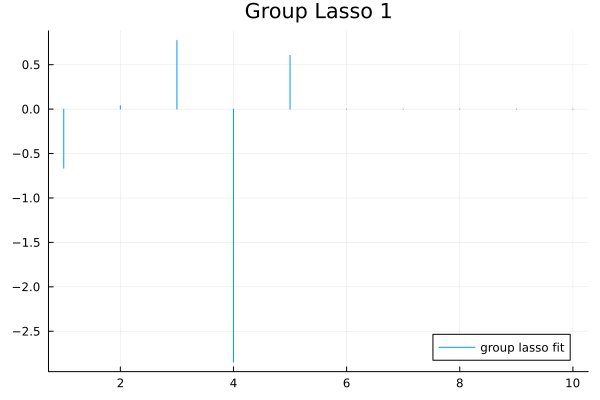

In [5]:
λ = 20
β̂glasso = Variable(size(X, 2))
problem = minimize(0.5sumsquares(y - X * β̂glasso) + λ * sqrt(3) * norm(β̂glasso[2:4], 2) + 
    λ * sqrt(2) * norm(β̂glasso[5:6], 2) + λ * sqrt(5) * norm(β̂glasso[7:end], 2))
solver = Mosek.Optimizer()  
MOI.set(solver, MOI.RawOptimizerAttribute("LOG"), 0) 
solve!(problem, solver)

#plot(β[2:end], line=:stem, label="true beta")
plot(β̂glasso.value[2:end], line=:stem, title="Group Lasso 1", label="group lasso fit")

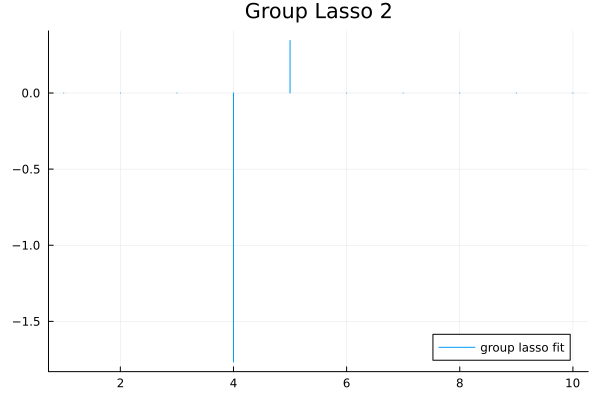

In [6]:
λ = 100
β̂glasso = Variable(size(X, 2))
problem = minimize(0.5sumsquares(y - X * β̂glasso) + λ * sqrt(3) * norm(β̂glasso[2:4], 2) + 
    λ * sqrt(2) * norm(β̂glasso[5:6], 2) + λ * sqrt(5) * norm(β̂glasso[7:end], 2))
solver = Mosek.Optimizer()  
MOI.set(solver, MOI.RawOptimizerAttribute("LOG"), 0) 
solve!(problem, solver)

#plot(β[2:end], line=:stem, label="true beta")
plot(β̂glasso.value[2:end], line=:stem, title="Group Lasso 2", label="group lasso fit")

## Example 2: square-root lasso 

* [Belloni, Chernozhukov, and Wang (2011)](https://doi.org/10.1093/biomet/asr043) minimizes
$$
	\|\mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \beta\|_2 + \lambda \|\beta\|_1
$$
by SOCP. This variant generates the solution path that is one-to-one with lasso (why?) but 
simplifies the choice of $\lambda$, as it does not depend on the variance of the additive noise.

---

  0.194603 seconds (162.87 k allocations: 16.071 MiB, 12.33% compilation time)


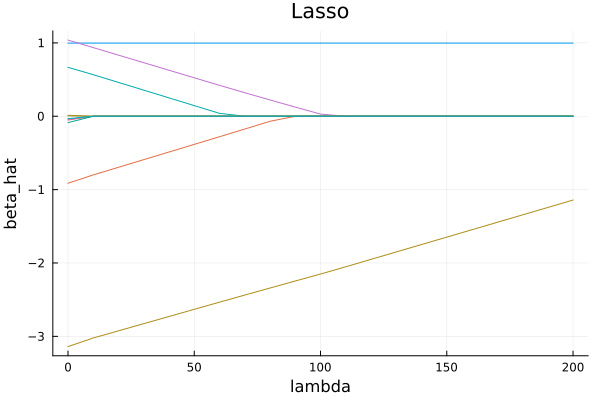

In [7]:
# solve at a grid of λ
λgrid = 0:10:200
β̂path = zeros(length(λgrid), size(X, 2)) # each row is β̂ at a λ
β̂lasso = Variable(size(X, 2))
@time for i in 1:length(λgrid)
    λ = λgrid[i]
    # objective
    problem = minimize(0.5sumsquares(y - X * β̂lasso) + λ * norm(β̂lasso[2:end], 1))
    solver = Mosek.Optimizer()  
    MOI.set(solver, MOI.RawOptimizerAttribute("LOG"), 0) 
    solve!(problem, solver)
    β̂path[i, :] = β̂lasso.value
end

plt = plot(collect(λgrid), β̂path, legend=:none)
xlabel!(plt, "lambda")
ylabel!(plt, "beta_hat")
title!(plt, "Lasso")

---

In [8]:
λlist = 0:0.5:10
βpath = zeros(length(λlist), size(X, 2)) # each row is β̂ at a λ
βsqrtlasso = Variable(size(X, 2))
@time for i = 1:length(λlist)
    λ = λlist[i]
    problem = minimize(norm(y - X * βsqrtlasso, 2) + λ * norm(βsqrtlasso[2:end], 1) )
    solver = Mosek.Optimizer()  
    MOI.set(solver, MOI.RawOptimizerAttribute("LOG"), 0) 
    solve!(problem, solver)
    βpath[i, :] = βsqrtlasso.value
end

  0.361814 seconds (306.92 k allocations: 25.685 MiB, 6.91% gc time, 49.63% compilation time)


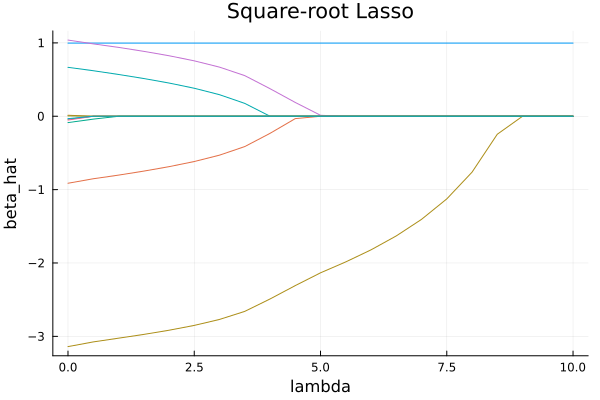

In [9]:
plt = plot(collect(λlist), βpath, legend=:none)
xlabel!(plt, "lambda")
ylabel!(plt, "beta_hat")
title!(plt, "Square-root Lasso")

---

### Alternative formulation: scaled lasso

[T. Sun and C.H. Zhang](https://doi.org/10.1093/biomet/ass043) propose the scaled lasso
$$
	\min_{\sigma > 0, \beta_0, \beta} ~ \frac{\sigma}{2} + \frac{\|\mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \beta\|_2^2}{2\sigma} + \lambda \|\beta\|_1
    .
$$

* By the AM-GM inequality, it is immediate that the scaled lasso is equivalent to the square root lasso.

* From the SOC representability of the epigraphs of quadratic-fractional functions, this alternative formulation is also SOCP.

---

  0.540314 seconds (450.59 k allocations: 35.594 MiB, 4.17% gc time, 67.51% compilation time)


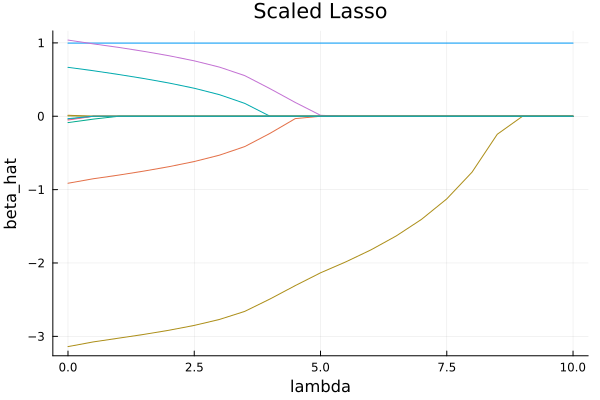

In [10]:
λlist = 0:0.5:10
βpath = zeros(length(λlist), size(X, 2)) # each row is β̂ at a λ
βscaledlasso = Variable(size(X, 2))
t = Variable()
@time for i = 1:length(λlist)
    λ = λlist[i]
    # watch the `quaroverlin` function: https://jump.dev/Convex.jl/stable/operations/#Second-Order-Cone-Representable-Functions
    problem = minimize(0.5t + 0.5quadoverlin(y - X * βscaledlasso, t) + λ * norm(βscaledlasso[2:end], 1))
    solver = Mosek.Optimizer() 
    MOI.set(solver, MOI.RawOptimizerAttribute("LOG"), 0) 
    solve!(problem, solver)
    βpath[i, :] = βscaledlasso.value
end

plt = plot(collect(λlist), βpath, legend=:none)
xlabel!(plt, "lambda")
ylabel!(plt, "beta_hat")
title!(plt, "Scaled Lasso")

## SOCP example: $\ell_p$-norm regression 

* $\ell_p$ regression with $p \ge 1$ a rational number
\begin{eqnarray*}
	&\text{minimize}& \|\mathbf{y} - \mathbf{X} \beta\|_p
\end{eqnarray*}
can be formulated as a SOCP. Why? For instance, $\ell_{3/2}$ regression combines advantage of both robust $\ell_1$ regression and least squares.

## SOCP example: image denoising by ROF model

![ROF](https://upload.wikimedia.org/wikipedia/en/thumb/e/e8/ROF_Denoising_Example.png/400px-ROF_Denoising_Example.png){width=400}

---

### ROF model:

> Rudin, L.I., Osher, S. and Fatemi, E., 1992. [Nonlinear total variation based noise removal algorithms](https://doi.org/10.1016/0167-2789(92)90242-F). Physica D: nonlinear phenomena, 60(1-4), pp.259-268. 

* Let $\mathbf{Y}\in\mathbb{R}^{n\times m}$ represent the image. The *isotropic total variation (TV) denoising* minimizes
$$
    \frac{1}{2}\|\mathbf{Y}-\mathbf{X}\|_{\rm F}^2 + \lambda \sum_{i,j}\sqrt{(x_{i+1,j}-x_{ij})^2 + (x_{i,j+1}-x_{ij})^2}, \quad \lambda > 0,
$$
where $\mathbf{X}=(x_{ij})$ is the optimization variable.

---

* SOCP method:

> Goldfarb, D. and Yin, W., 2005. Second-order cone programming methods for total variation-based image restoration. SIAM Journal on Scientific Computing, 27(2), pp.622-645. <https://doi.org/10.1137/040608982>

## References

- [Lobo, Vandergerghe, Boyd, Lebret (1998)](https://doi.org/10.1016/S0024-3795(98)10032-0)
- [Alizadeh and Goldfarb (2003)](https://doi.org/10.1007/s10107-002-0339-5)
- [Ben-Tal and Nemirovski (2001)](https://doi.org/10.1137/1.9780898718829)
    
